In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from Images import plots
#import pingouin as pg

In [3]:
def assign_vals(table, cols, new_col):
    for i, c in enumerate(cols):
        new_c = new_col[i]
        table[new_c] = 0
        for tid in table.index:
            data = pd.read_csv('./Dataset/Data/%s.tsv'%tid, sep='\t', index_col=0)
            table.loc[tid, new_c] = data[c].max()

    return table

# SVM

In [14]:
random_bias     = pd.read_csv('./Score_wodirection_trtssplit/SVM/mean.tsv', sep='\t', index_col=0)
random_balance  = pd.read_csv('./Score_unbiased_trtssplit/SVM/mean.tsv', sep='\t', index_col=0)
bothout_bias    = pd.read_csv('./Score_axv/SVM/mean_bothout.tsv', sep='\t', index_col=0)
bothout_balance = pd.read_csv('./Score_unbiased_axv/SVM/mean_bothout.tsv', sep='\t', index_col=0)

random_bias     = random_bias.loc[random_balance.index,:]
bothout_bias    = bothout_bias.loc[bothout_balance.index, :]

random_bias     = assign_vals(random_bias, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
random_balance  = assign_vals(random_balance, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
bothout_bias    = assign_vals(bothout_bias, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
bothout_balance = assign_vals(bothout_balance, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])

random_bias['model']     = 'Data leakage possibly included'
random_balance['model']  = 'Data leakage possibly included'
bothout_bias['model']    = 'Data leakage excluded'
bothout_balance['model'] = 'Data leakage excluded'

random_bias['balance']     = 'biased'
random_balance['balance']  = 'balanced'
bothout_bias['balance']    = 'biased'
bothout_balance['balance'] = 'balanced'


all_score = pd.concat([random_bias, random_balance, bothout_bias, bothout_balance])
all_score['subject'] = all_score.index.tolist()


/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


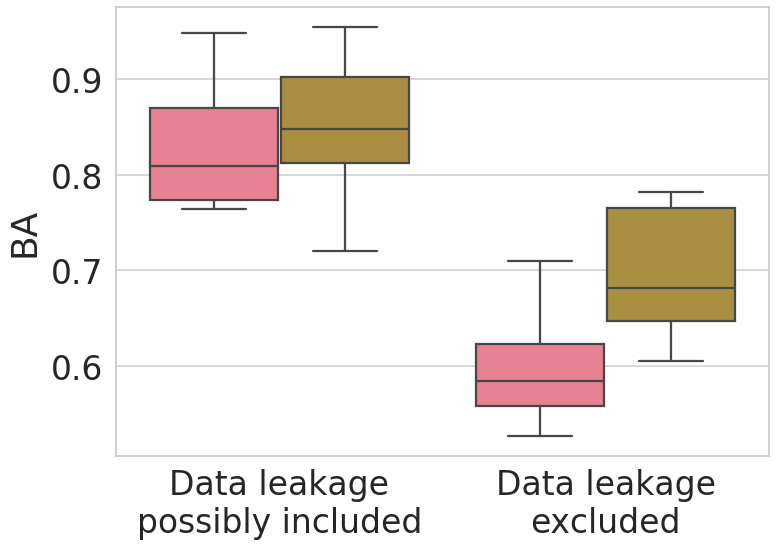

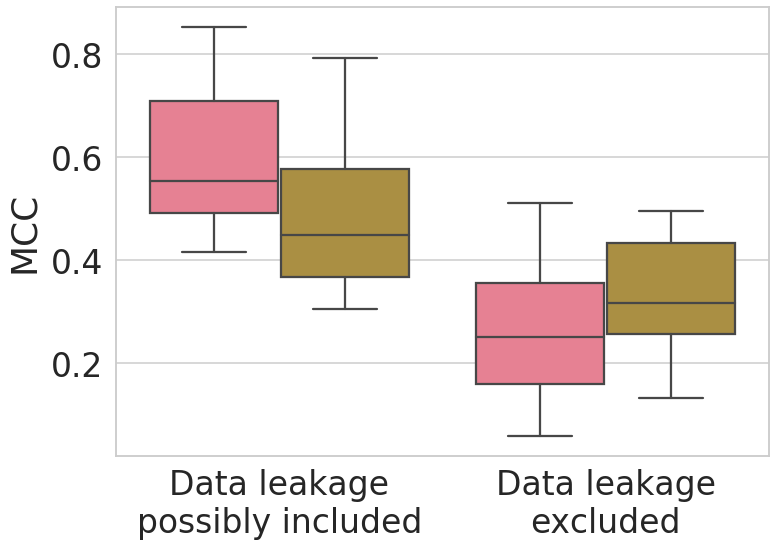

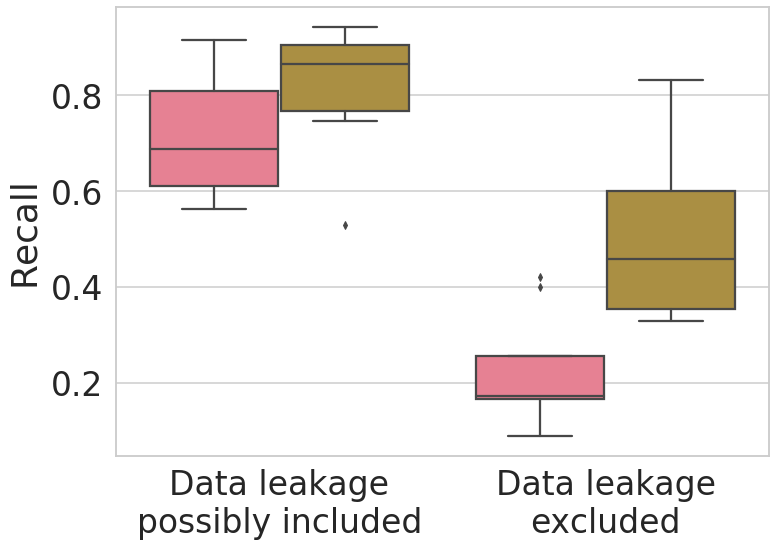

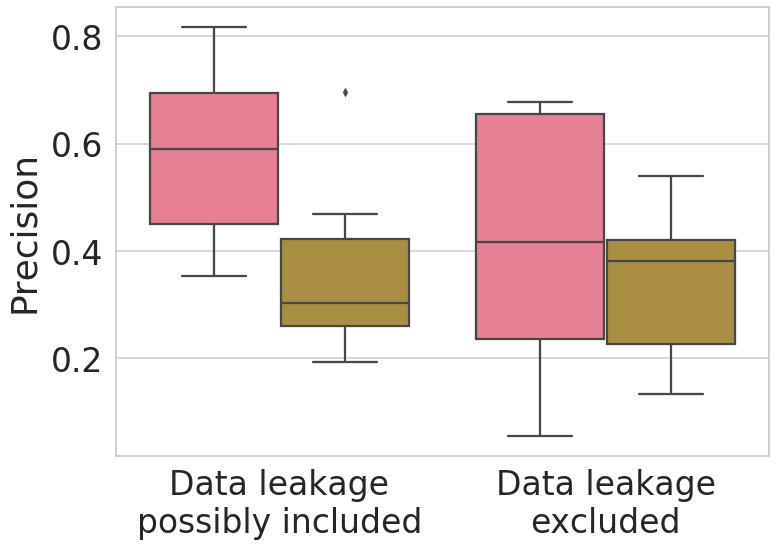

In [15]:
for metric, ylabel in zip(['balanced_accuracy', 'matthews_coeff', 'recall', 'precision'], ['BA', 'MCC', 'Recall', 'Precision']):
    ax=plots.MakeBoxPlotsSeaborn(table     = all_score,
                            xname     = 'model',
                            yname     = metric,
                            hue       = 'balance',
                            use_swarm = False,
                            show_legend=False,
                            context   = 'talk',
                           font_scale= 2,
                           font      = 'Segoe UI',
                            )
    
    ax.yaxis.labelpad = 10
    ax.set(ylabel=ylabel, xlabel=None)
    ax.set_xticklabels(['Data leakage\npossibly included', 'Data leakage\nexcluded'], ha='center')

In [5]:
val_name = 'matthews_coeff'
pg.ttest(svm_b[val_name].values, svm_ub[val_name].values, paired=True)

AttributeError: 'NotebookFormatter' object has no attribute 'get_result'

               T  dof alternative     p-val         CI95%   cohen-d    BF10  \
T-test  4.580627    9   two-sided  0.001327  [0.06, 0.17]  0.787494  32.297   

          power  
T-test  0.60283  

# MPNN

In [11]:
random_bias     = pd.read_csv('./Score_wodirection_trtssplit/MPNN_separated/mean.tsv', sep='\t', index_col=0)
random_balance  = pd.read_csv('./Score_unbiased_trtssplit/MPNN_separated/mean.tsv', sep='\t', index_col=0)
bothout_bias    = pd.read_csv('./Score_axv/MPNN_separated/mean_bothout.tsv', sep='\t', index_col=0)
bothout_balance = pd.read_csv('./Score_unbiased_axv/MPNN_separated/mean_bothout.tsv', sep='\t', index_col=0)

random_bias     = random_bias.loc[random_balance.index,:]
bothout_bias    = bothout_bias.loc[bothout_balance.index, :]

random_bias     = assign_vals(random_bias, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
random_balance  = assign_vals(random_balance, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
bothout_bias    = assign_vals(bothout_bias, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
bothout_balance = assign_vals(bothout_balance, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])

random_bias['model']     = 'Data leakage possibly included'
random_balance['model']  = 'Data leakage possibly included'
bothout_bias['model']    = 'Data leakage excluded'
bothout_balance['model'] = 'Data leakage excluded'

random_bias['balance']     = 'biased'
random_balance['balance']  = 'balanced'
bothout_bias['balance']    = 'biased'
bothout_balance['balance'] = 'balanced'


all_score = pd.concat([random_bias, random_balance, bothout_bias, bothout_balance])
all_score['subject'] = all_score.index.tolist()


/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
findfont: Font family ['Segoe UI'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Segoe UI'] not found. Falling back to DejaVu Sans.


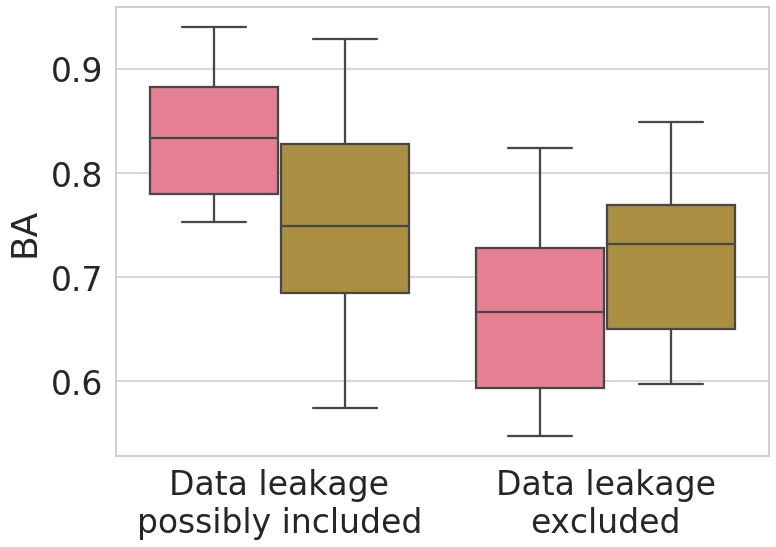

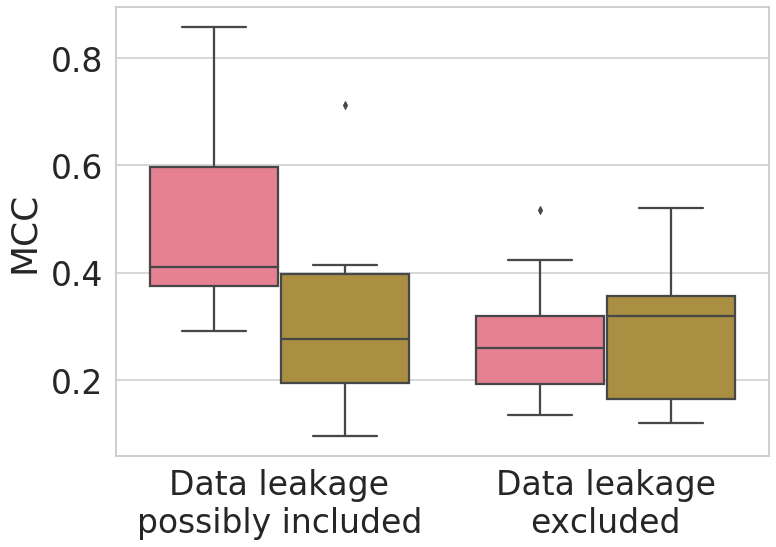

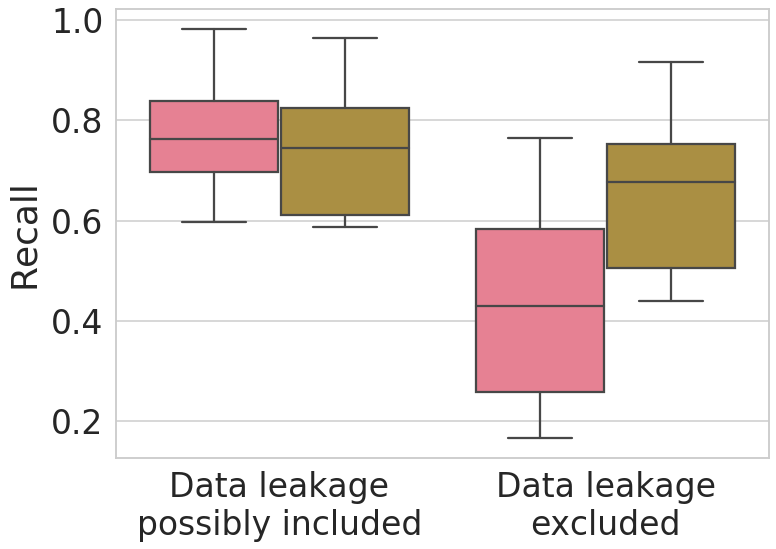

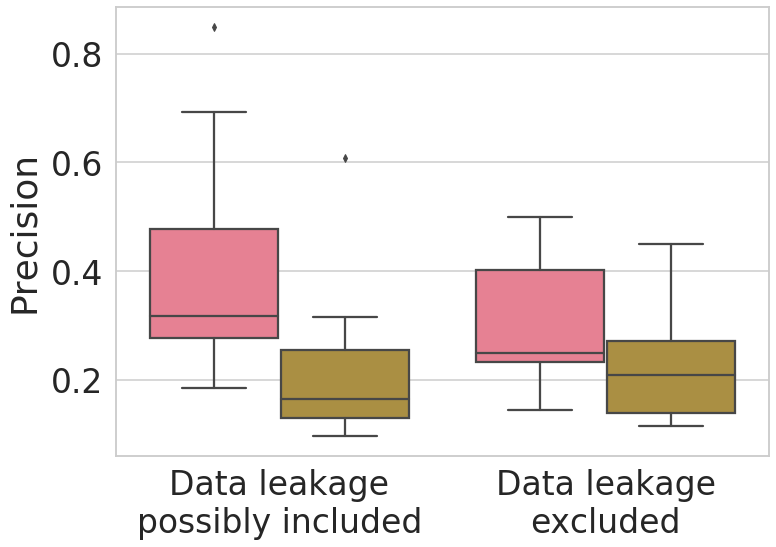

In [13]:
for metric, ylabel in zip(['balanced_accuracy', 'matthews_coeff', 'recall', 'precision'], ['BA', 'MCC', 'Recall', 'Precision']):
    ax=plots.MakeBoxPlotsSeaborn(table     = all_score,
                            xname     = 'model',
                            yname     = metric,
                            hue       = 'balance',
                            use_swarm = False,
                            show_legend=False,
                            context   = 'talk',
                           font_scale= 2,
                           font      = 'Segoe UI',
                            )
    
    ax.yaxis.labelpad = 10
    ax.set(ylabel=ylabel, xlabel=None)
    ax.set_xticklabels(['Data leakage\npossibly included', 'Data leakage\nexcluded'], ha='center')

In [9]:
val_name = 'precision'
pg.ttest(mpn_sep_b[val_name].values, mpn_sep_ub[val_name].values, paired=True)

AttributeError: 'NotebookFormatter' object has no attribute 'get_result'

               T  dof alternative     p-val         CI95%   cohen-d  BF10  \
T-test  2.802511    9   two-sided  0.020628  [0.01, 0.12]  0.549229  3.49   

           power  
T-test  0.342295  